<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/02132.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7.8 Adam 算法

### 7.8.2 从零开始实现

In [0]:
!mkdir ../../data

In [2]:
!git clone https://github.com/ShusenTang/Dive-into-DL-PyTorch.git 

Cloning into 'Dive-into-DL-PyTorch'...
remote: Enumerating objects: 1692, done.
remote: Total 1692 (delta 0), reused 0 (delta 0), pack-reused 1692
Receiving objects: 100% (1692/1692), 25.29 MiB | 16.79 MiB/s, done.
Resolving deltas: 100% (975/975), done.


In [0]:
!cp Dive-into-DL-PyTorch/data/airfoil_self_noise.dat ../../data

In [0]:
%matplotlib inline 
import torch 
import d2l 

features, labels = d2l.get_data_ch7()

def init_adam_states():
    v_w, v_b = torch.zeros((features.shape[1], 1), dtype=torch.float32), torch.zeros(1, dtype=torch.float32)
    s_w, s_b = torch.zeros((features.shape[1], 1), dtype=torch.float32), torch.zeros(1, dtype=torch.float32)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6 
    for p, (v, s) in zip(params, states):
        v[:] = beta1 * v + (1 - beta1) * p.grad.data 
        s[:] = beta2 * s + (1 - beta2) * p.grad.data ** 2 
        v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
        s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
        p.data -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr) + eps)
    hyperparams['t'] += 1 

loss: 0.244044, 0.108567 sec per epoch


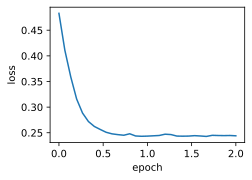

In [8]:
d2l.train_ch7(adam, init_adam_states(), {'lr':0.01, 't': 1}, features, labels)

### 7.8 3 简洁实现

loss: 0.243012, 0.086102 sec per epoch


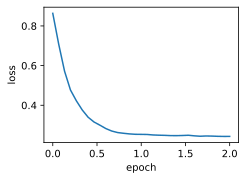

In [9]:
d2l.train_pytorch_ch7(torch.optim.Adam, {'lr': 0.01}, features, labels)